In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [14]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [3]:
#Generate the dataset
df = pd.read_csv('/content/drive/MyDrive/Competitions/flights_train.csv')
df.head()

,flight_date,from,to,avg_weeks,target,std_weeks
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [4]:
#General info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8896 entries, 0 to 8895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flight_date  8896 non-null   object 
 1   from         8896 non-null   object 
 2   to           8896 non-null   object 
 3   avg_weeks    8896 non-null   float64
 4   target       8896 non-null   float64
 5   std_weeks    8896 non-null   float64
dtypes: float64(3), object(3)
memory usage: 417.1+ KB


In [6]:
#Convert flight_date type to datetime
df['flight_date'] = df['flight_date'].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


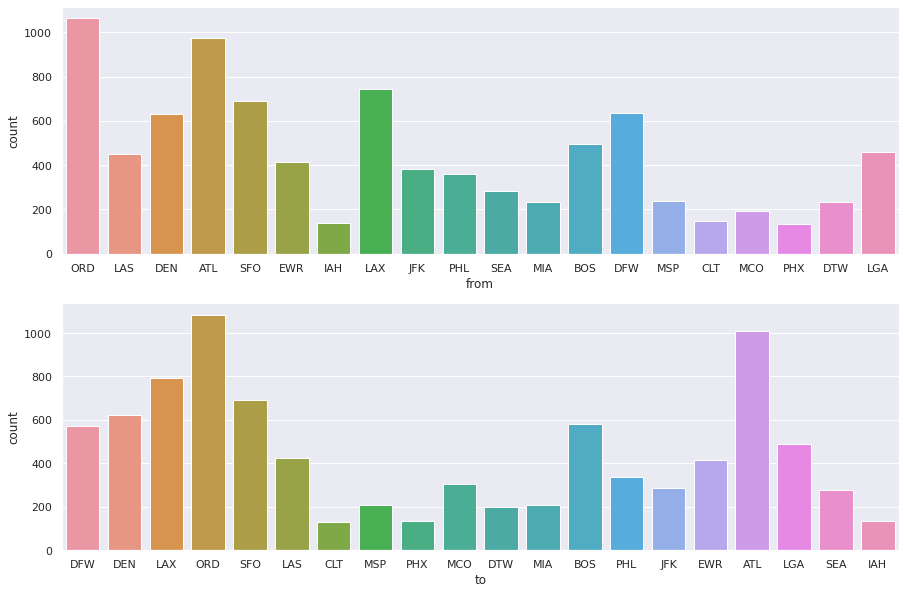

In [9]:
#Let's now plot categorical columns
sns.set(font_scale=1)
fig, ax = plt.subplots(2,1, figsize=(15,10))
sns.countplot(df['from'], ax=ax[0])
sns.countplot(df['to'], ax=ax[1])

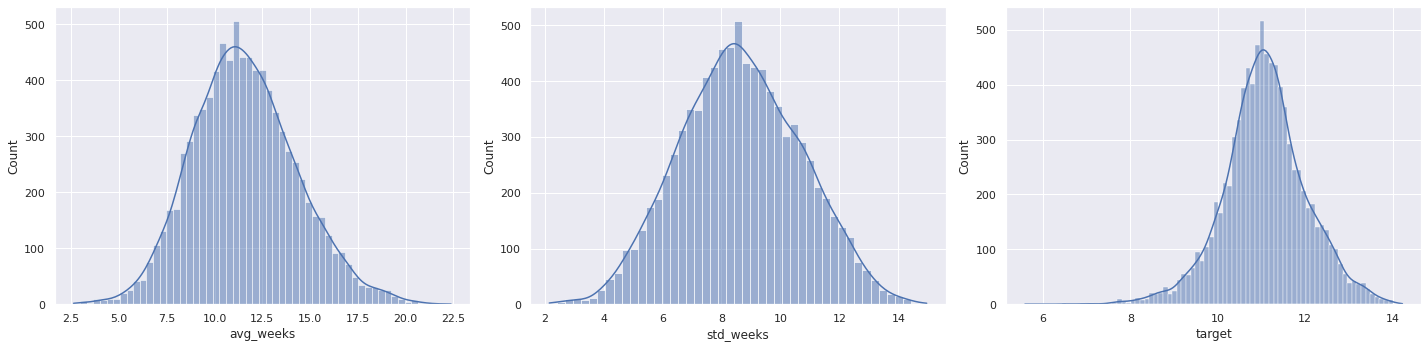

In [10]:
# Let's now plot numerical columns histograms
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(data=df, x='avg_weeks' , ax=ax[0], kde=True)
sns.histplot(data=df, x='std_weeks' , ax=ax[1], kde=True)
sns.histplot(data=df, x='target' , ax=ax[2], kde=True)
plt.tight_layout()
plt.show()

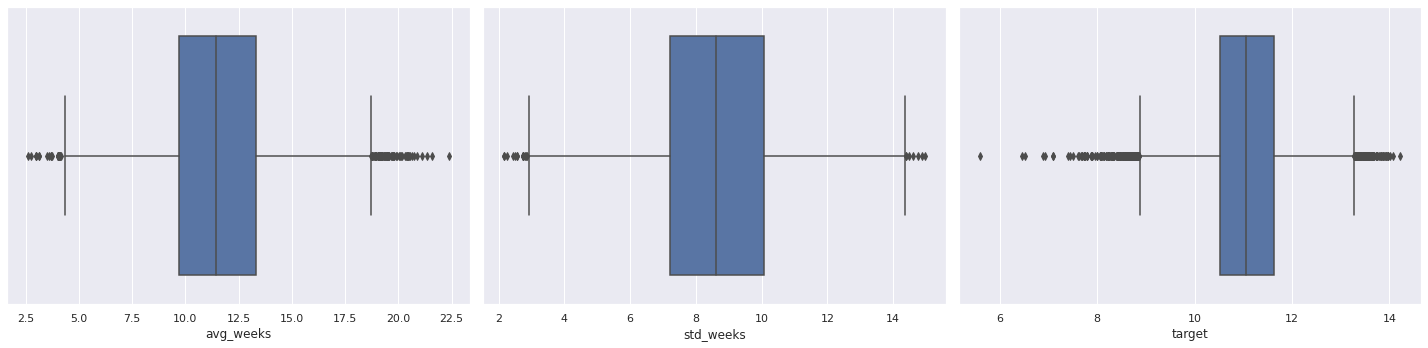

In [11]:
# Let's now plot numerical columns boxplots
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(data=df, x='avg_weeks' , ax=ax[0])
sns.boxplot(data=df, x='std_weeks' , ax=ax[1])
sns.boxplot(data=df, x='target' , ax=ax[2])
plt.tight_layout()
plt.show()

In [18]:
#Create a dataframe with grouped days to use in time series
df1 = df[['flight_date', 'target']]
df2 = df1.groupby(df1.flight_date)
df2 = df2.aggregate(np.sum)

In [19]:
df2.head()

,target
flight_date,
2011-09-01,206.650717
2011-09-02,227.127131
2011-09-03,190.966252
2011-09-04,167.543424
2011-09-05,321.383310


Text(0, 0.5, 'Evolution of the target variable over time')

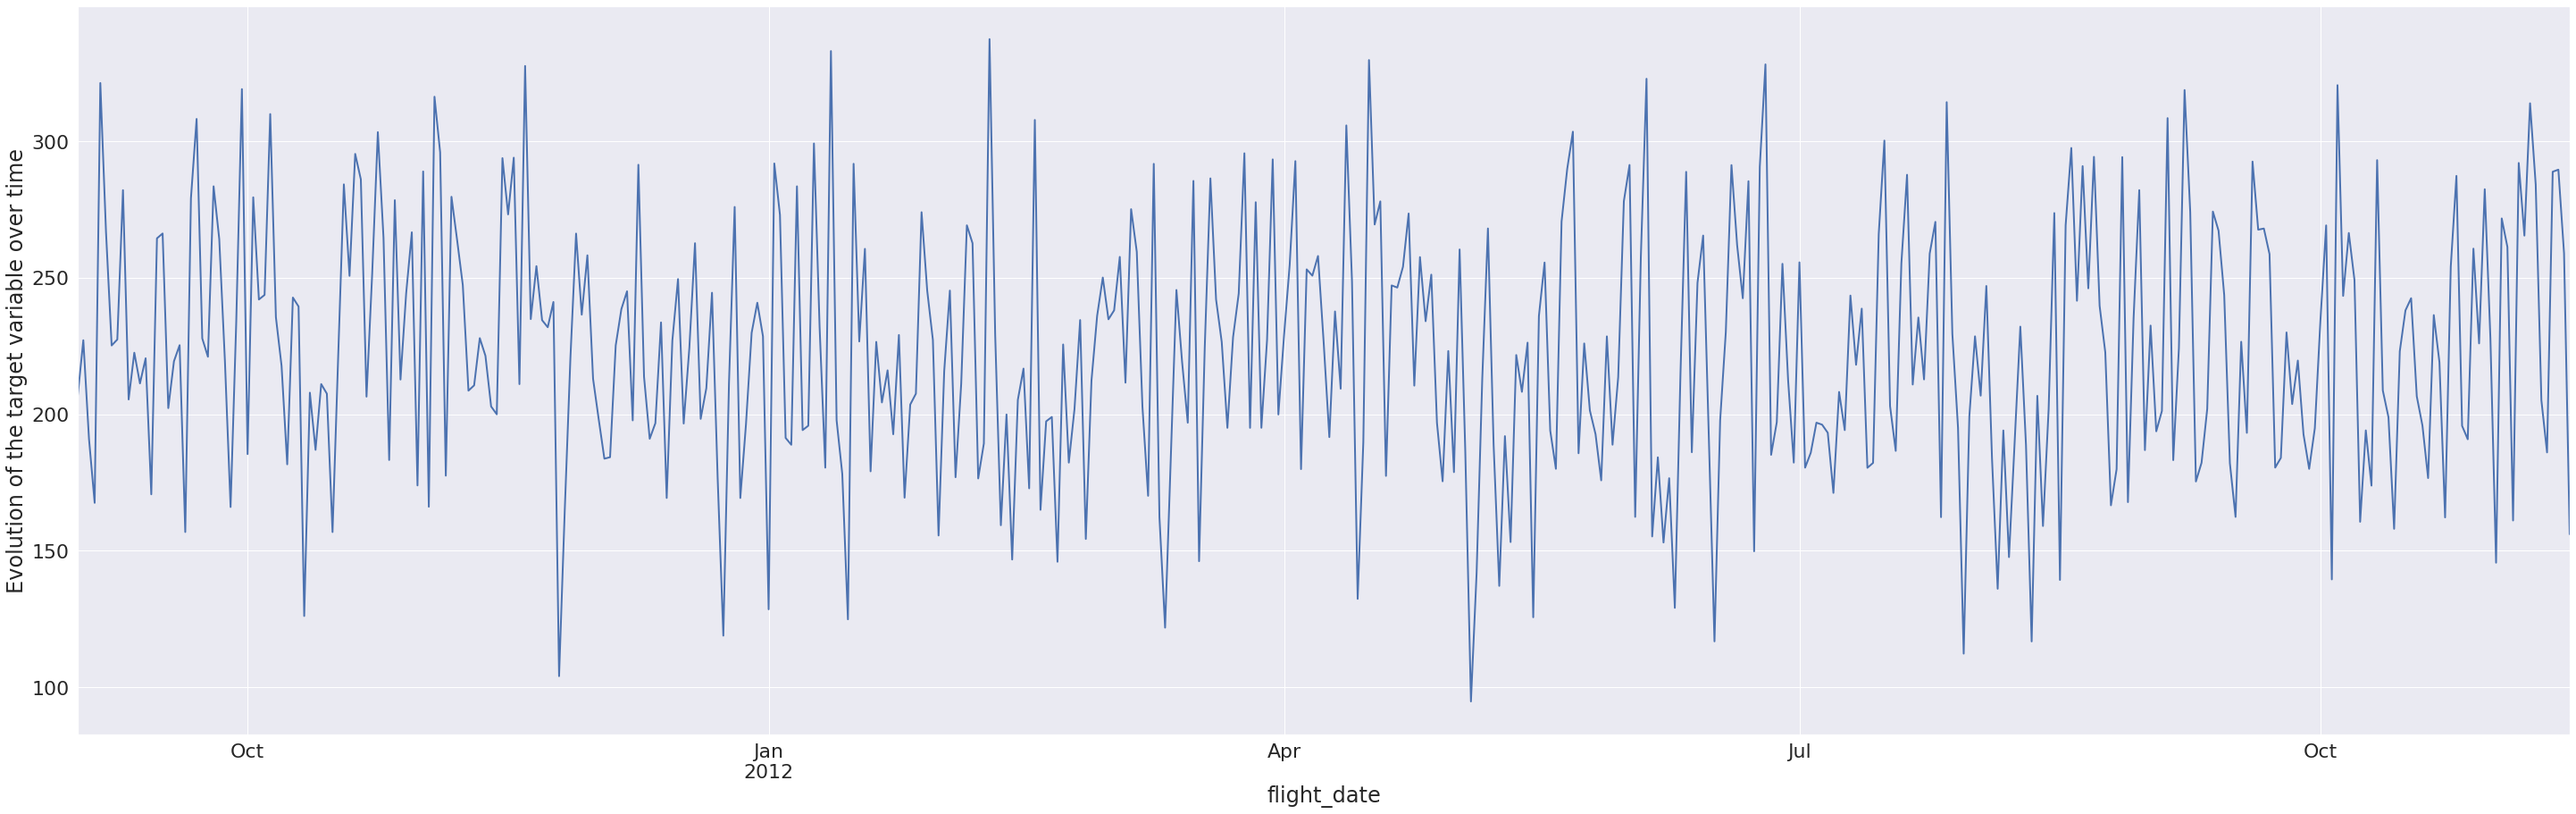

In [13]:
#Plot of the evolution of the target over time
sns.set(rc={'figure.figsize':(50, 15)}, font_scale=2)
ax = df2['target'].plot(linewidth=2)
ax.set_ylabel('Evolution of the target variable over time')

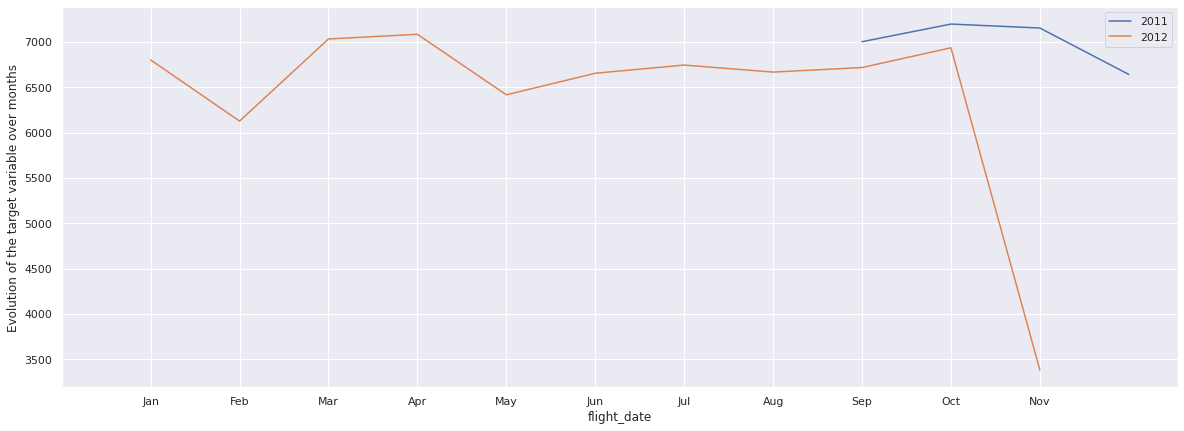

In [29]:
#Plot of the evolution of the target over months
sns.set(font_scale=1)
df_plot = df2.groupby([df2.index.month,df2.index.year]).sum().unstack()
df_plot

fig, ax = plt.subplots(figsize=(20,7))
df_plot.plot(ax=ax,legend=False)

months = [calendar.month_abbr[i] for i in range(0,12)]
ax.set_xticks(range(12))
ax.set_xticklabels(months)
ax.set_ylabel('Evolution of the target variable over months')
ax.legend(labels=["2011","2012"])

In [30]:
#Convert flight_date to new columns: year, month and day
df['year'] = pd.DatetimeIndex(df['flight_date']).year
df['month'] = pd.DatetimeIndex(df['flight_date']).month
df['day'] = pd.DatetimeIndex(df['flight_date']).day

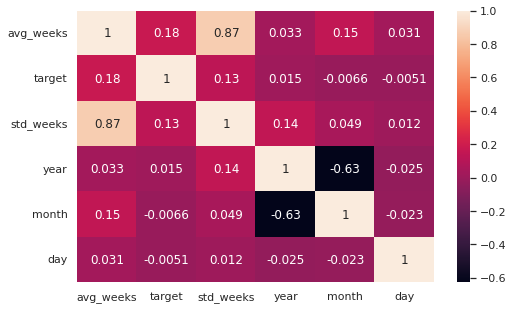

In [36]:
#Correlation matrix
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)

In [37]:
#Import final dataset
data = pd.read_csv('/content/drive/MyDrive/Competitions/final_data_train_merged.csv')
data.head()

,flight_date,from,to,avg_weeks,target,std_weeks,from_latitude,from_longitude,to_latitude,to_longitude,distance,year,dayofweek,month,day,week,julian,Average Fare ($),Average Fare ($)_to,Fare
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647,41.974163,-87.907320,32.899810,-97.04034,1289.698532,2012,1,6,19,25,900,385.05,430.71,3.842887
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734,36.084000,-115.153740,39.856100,-104.67374,1010.700812,2012,0,9,10,37,983,269.62,320.91,3.956805
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883,39.856100,-104.673740,33.941590,-118.40853,1386.808962,2012,4,10,5,40,1008,320.91,401.84,4.405865
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202,33.640728,-84.427704,41.974163,-87.90732,974.145965,2011,6,10,9,40,646,368.74,378.78,2.401525
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159,39.856100,-104.673740,37.621310,-122.37895,1556.562600,2012,1,2,21,8,781,320.91,408.14,4.479947


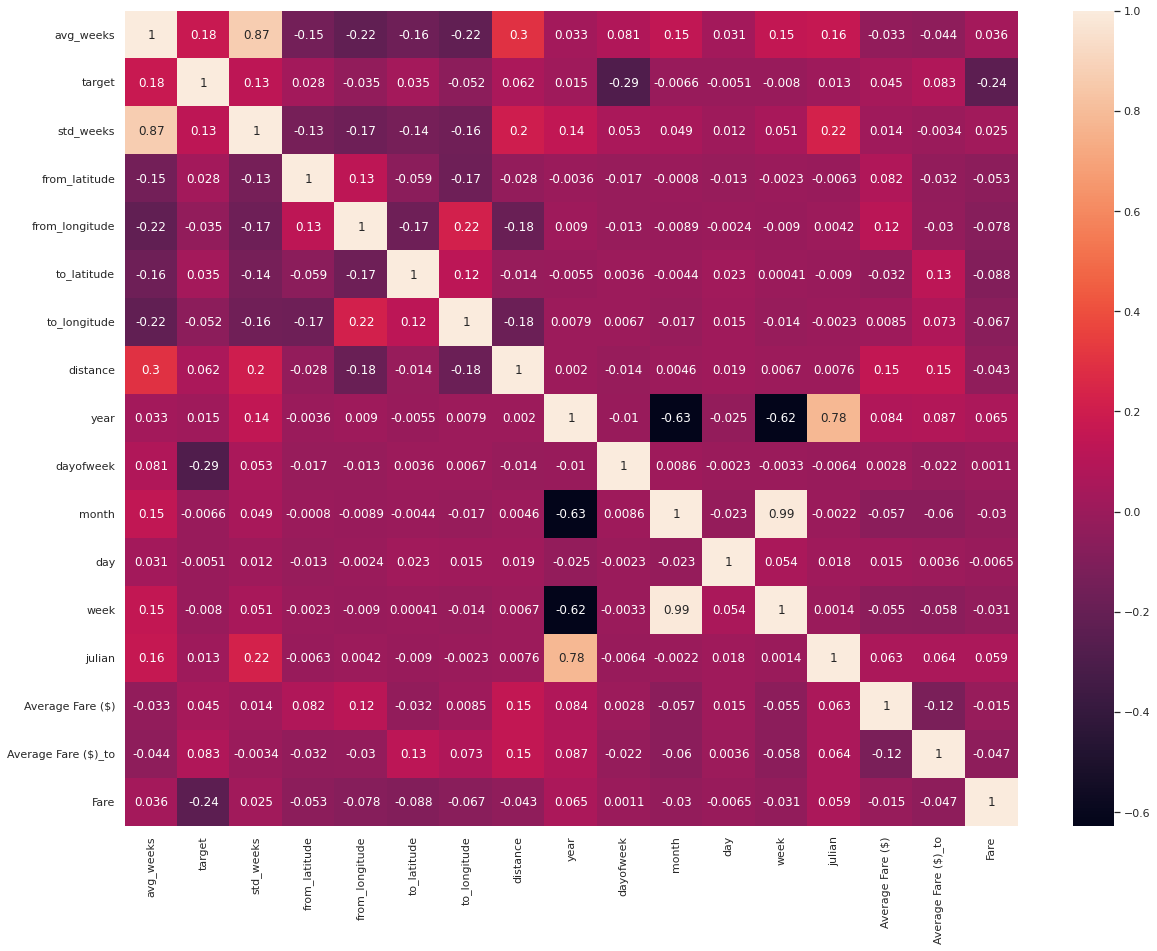

In [40]:
#Correlation matrix
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True)